# Import libraries

In [1]:
import numpy as np # linear algebra
import os
from tqdm import tqdm
from tensorflow import keras
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

# Preprocess data

In [2]:
path = '/kaggle/input/intel-image-classification'

In [3]:
labels = ['buildings','forest','glacier','mountain','sea','street']

In [4]:
print("pre-processing data\n")
image_data = []
label_data = []
image_size = 150
data_dirs = ["seg_train/seg_train", "seg_test/seg_test"]  # List of directories to load data from
for data_dir in data_dirs:
    for i in labels:
        data_path = os.path.join("/kaggle/input/intel-image-classification/", data_dir, i)
        for m in tqdm(os.listdir(data_path)):
            image = cv2.imread(os.path.join(data_path, m))
            image = cv2.resize(image, (image_size, image_size))
            image_data.append(image)
            label_data.append(i)
image_data = np.array(image_data)
label_data = np.array(label_data)

pre-processing data



100%|██████████| 501/501 [00:05<00:00, 95.95it/s] 


# split data

In [5]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

# To categorical

In [6]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

# VGG19 model

In [7]:
vgg = VGG19(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(6, activation='softmax')(x)
modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,073,542 (76.57 MB)

 Trainable params: 49,158 (192.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [8]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [21]:
history=modelvgg.fit(X_train,Y_train,
 epochs=10,batch_size= 10,
 validation_data=(X_test,Y_test), callbacks=callback)

Epoch 1/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 66s 49ms/step - auc: 0.9632 - loss: 2.3370 - val_auc: 0.9387 - val_loss: 7.2415
Epoch 2/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - auc: 0.9740 - loss: 1.6260 - val_auc: 0.9356 - val_loss: 8.4334
Epoch 3/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - auc: 0.9816 - loss: 0.9179 - val_auc: 0.9403 - val_loss: 8.4041
Epoch 4/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - auc: 0.9832 - loss: 0.9497 - val_auc: 0.9415 - val_loss: 9.1244
Epoch 5/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - auc: 0.9869 - loss: 0.7600 - val_auc: 0.9405 - val_loss: 9.2472
Epoch 6/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - auc: 0.9869 - loss: 0.7476 - val_auc: 0.9380 - val_loss: 9.8948
Epoch 7/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - auc: 0.9895 - loss: 0.5548 - val_auc: 0.9364 - val_loss: 11.3836
Epoch 8/10
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - auc: 0.9897 - loss: 0.5276 - val_auc: 0.9397 - val_loss: 11.2756


# Accurcay and Loss

In [22]:
loss, accuracy = modelvgg.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

426/426 ━━━━━━━━━━━━━━━━━━━━ 34s 79ms/step - auc: 0.9795 - loss: 1.2879
Train Loss:  1.4268192052841187
Train Accuracy:  0.978075385093689


In [23]:
loss, accuracy = modelvgg.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - auc: 0.9411 - loss: 6.6602
Test Loss:  7.241503715515137
Test Accuracy:  0.9387109279632568


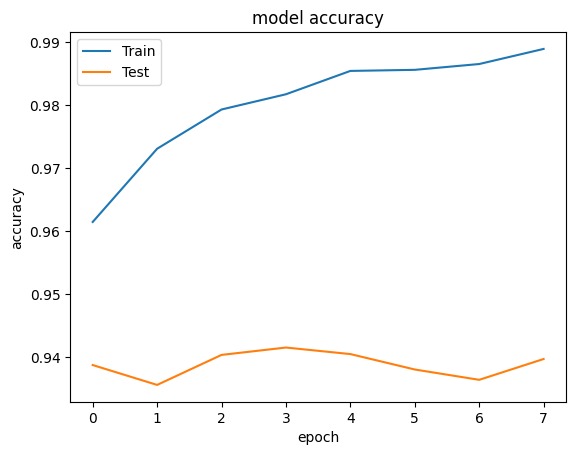

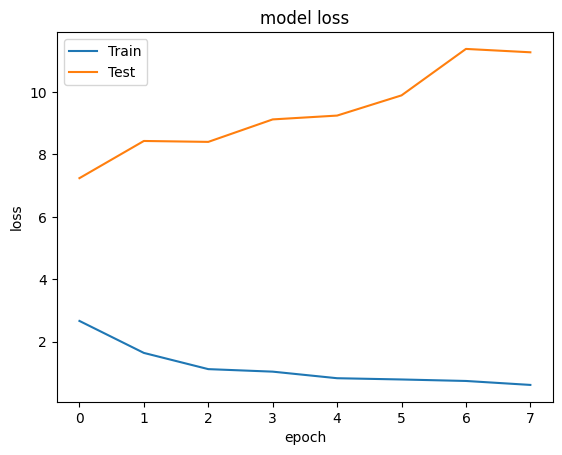

In [24]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion Matrix and Classification Report

In [25]:
predictions = modelvgg.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step
[[507   1   1   1   1  28]
 [  1 556   5   4   1   0]
 [  1   3 414  94  37   2]
 [  1   1  73 507  13   0]
 [  6   1   4  10 566   1]
 [ 71   2   4   6   5 479]]


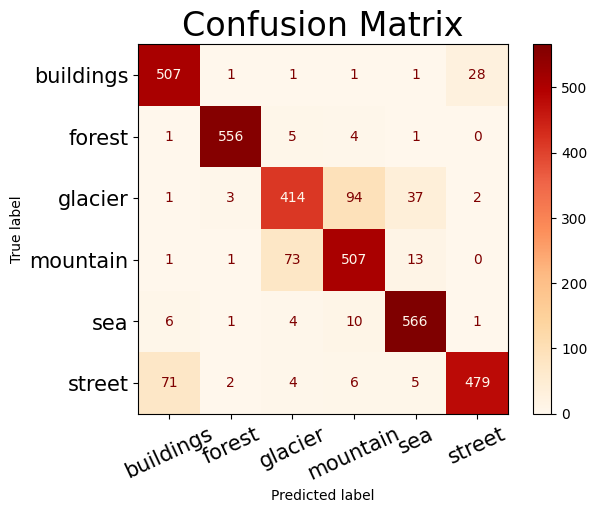

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       539
           1       0.99      0.98      0.98       567
           2       0.83      0.75      0.79       551
           3       0.82      0.85      0.83       595
           4       0.91      0.96      0.93       588
           5       0.94      0.84      0.89       567

    accuracy                           0.89      3407
   macro avg       0.89      0.89      0.89      3407
weighted avg       0.89      0.89      0.89      3407



In [26]:
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))